# Clusters Stats

In [26]:
# imports
from importlib import reload
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from siosandbox.cugn import clusters

# Plot defs

In [33]:
def color_scatter(clusters, x:str, y:str, c:str, cmap:str='jet', s=0.8,
                 logc=False, xlabel=None):
    plt.clf()
    ax = plt.gca()
    cval = clusters[c].values
    if logc:
        cval = np.log10(cval)
    sc = ax.scatter(clusters[x], clusters[y], c=cval, cmap=cmap, s=s)
    #
    cbaxes = plt.colorbar(sc, pad=0., fraction=0.030)
    clbl = c if not logc else 'log10 '+c
    cbaxes.set_label(clbl, fontsize=14.)
    # Axes
    if xlabel is None:
        xlabel = x 
    ax.set_xlabel(xlabel)
    ax.set_ylabel(y)
    #
    plt.show()

# Load up

In [27]:
line = '90'
perc = 98.
grid_outliers = clusters.generate_clusters(line, perc)

# Cluster stats
reload(clusters)
cluster_stats = clusters.cluster_stats(grid_outliers)

Found 386 unique clusters


# Explore

## Basics

<Axes: xlabel='doxy', ylabel='Count'>

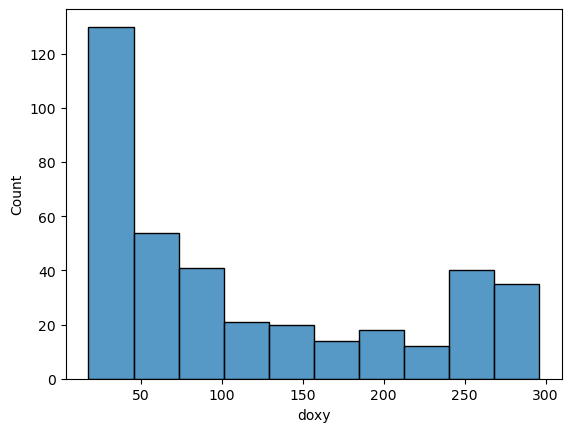

In [3]:
sns.histplot(cluster_stats, x='doxy')

<Axes: xlabel='z', ylabel='Count'>

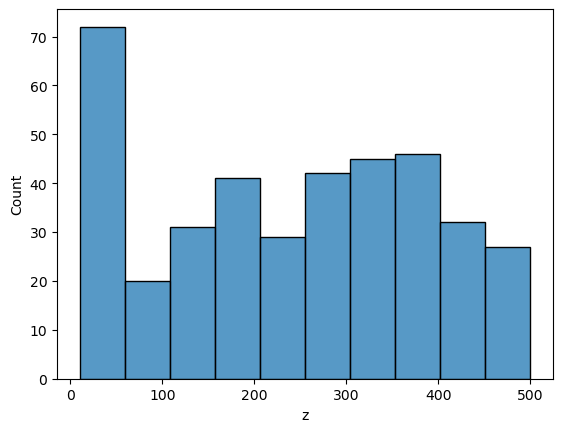

In [5]:
sns.histplot(cluster_stats, x='z')

<Axes: xlabel='lon', ylabel='Count'>

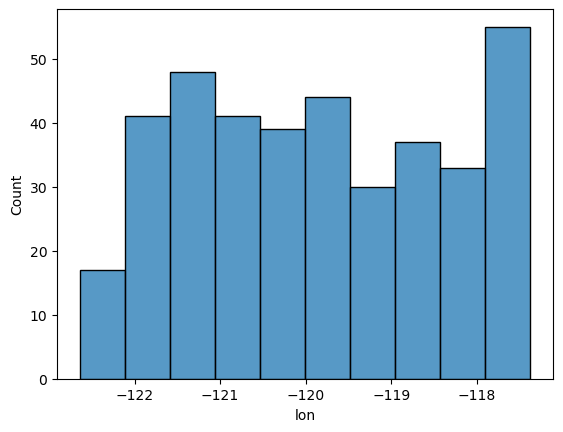

In [6]:
sns.histplot(cluster_stats, x='lon')

<Axes: xlabel='N', ylabel='Count'>

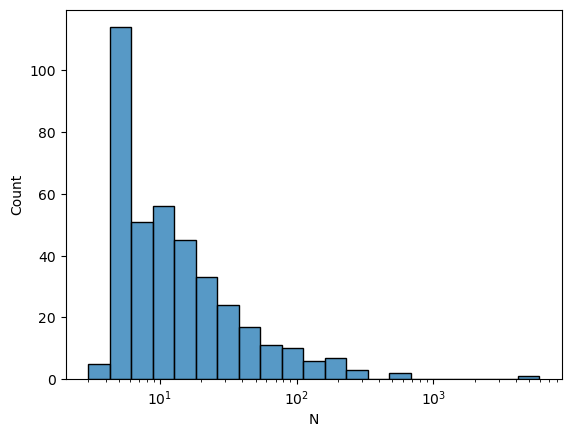

In [29]:
sns.histplot(cluster_stats, x='N', log_scale=(True,False))

In [30]:
imax = np.argmax(cluster_stats.N)
cluster_stats.iloc[imax]

z                              303.023529
lon                           -120.281214
doxy                            73.866931
time        2020-04-15 19:26:05.015966464
SA                               34.29368
CT                               7.886848
sigma0                          26.604211
SO                               0.259184
chla                             0.156924
max_doxy                       211.887211
max_SO                           0.782482
max_chla                           0.3315
N                                    5950
cluster                                93
Name: 93, dtype: object

## Bivariate

### Spatial

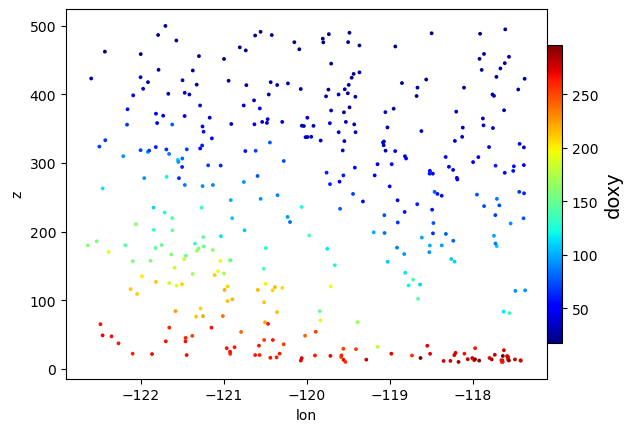

In [16]:
color_scatter(cluster_stats, 'lon', 'z', 'doxy', s=3.)

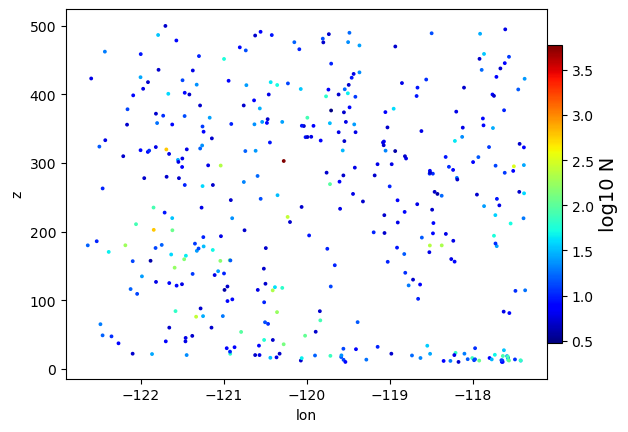

In [31]:
color_scatter(cluster_stats, 'lon', 'z', 'N', s=3., logc=True)

## SO

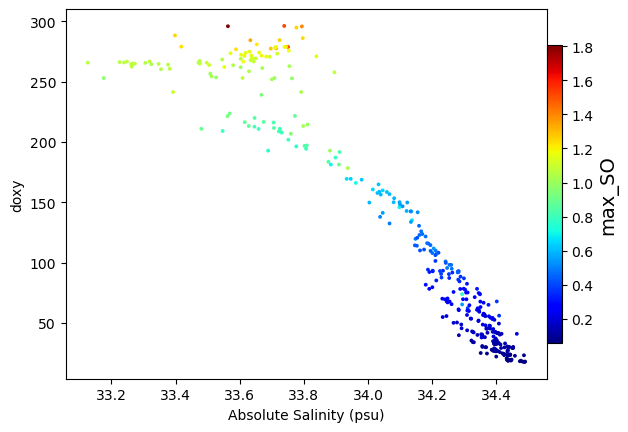

In [34]:
color_scatter(cluster_stats, 'SA', 'doxy', 'max_SO', s=3., xlabel='Absolute Salinity (psu)')

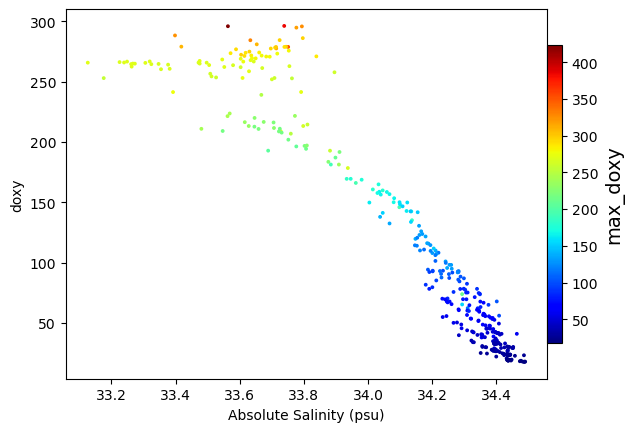

In [37]:
color_scatter(cluster_stats, 'SA', 'doxy', 'max_doxy', s=3., xlabel='Absolute Salinity (psu)')

## Chla

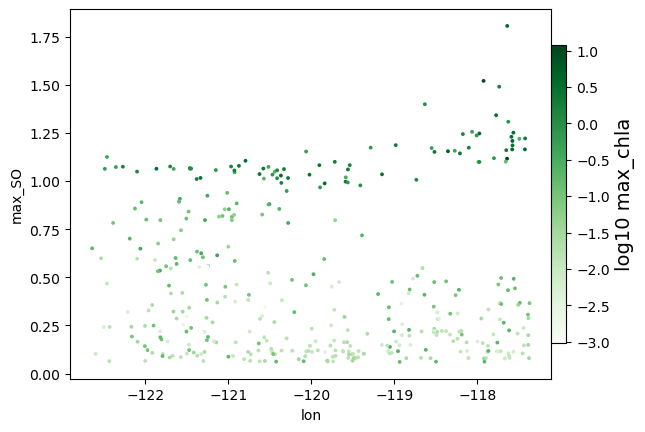

In [35]:
color_scatter(cluster_stats, 'lon', 'max_SO', 'max_chla', s=3., logc=True, cmap='Greens')

----

In [36]:
imax_SO = np.argmax(cluster_stats.SO)
cluster_stats.iloc[imax_SO]

z                               15.714286
lon                           -118.633536
doxy                           295.729095
time        2018-06-26 23:33:49.666666496
SA                              33.793906
CT                              16.816473
sigma0                          24.511385
SO                               1.225745
chla                             0.528651
max_doxy                       325.383185
max_SO                           1.399523
max_chla                         1.004586
N                                      21
cluster                                 8
Name: 8, dtype: object